# Tutorial 07: Introduction to LangGraph

In this tutorial, we'll explore LangGraph, a powerful library for building complex, stateful workflows with language models.

## 1. What is LangGraph and how does it differ from LangChain?

LangGraph is an extension of LangChain that focuses on building stateful, multi-step workflows. While LangChain provides building blocks for working with language models, LangGraph allows you to create more complex, graph-based workflows with explicit state management.

Key differences:
- LangGraph introduces the concept of a 'graph' to represent workflows
- It provides better support for stateful applications
- LangGraph allows for more complex branching and conditional logic
- It's designed for building multi-agent systems and complex decision-making processes

## 2. Basic concepts: Nodes, Edges, and Graphs

In LangGraph:
- **Nodes** represent individual steps or actions in a workflow
- **Edges** define the connections and flow between nodes
- **Graphs** combine nodes and edges to create a complete workflow

These concepts allow you to create more structured and complex applications compared to linear chains in LangChain.

## 3. Setting up LangGraph

Let's start by importing the necessary modules and setting up our environment:

In [1]:
import os
from typing import Dict, TypedDict,List
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from langchain.schema import BaseMessage
from langgraph.graph import StateGraph, END

# Set up the Groq LLM
llm = ChatGroq(
        model_name="qwen-2.5-32b",
        temperature=0.1,
        model_kwargs={"top_p": 0.5, "seed": 1337}
    )
# Define our state structure
class State(TypedDict):
    messages: List[BaseMessage]
    next_step: str

## 4. Creating your first LangGraph flow

Let's create a simple conversational agent using LangGraph. This agent will greet the user, ask for their name, and then provide a personalized response.

In [2]:
# Define our graph
workflow = StateGraph(State)

# Define our nodes
def greet(state: State) -> State:
    state["messages"].append({"role": "assistant", "content": "Hello! What's your name?"})
    state["next_step"] = "get_name"
    return state

def get_name(state: State) -> State:
    name = state["messages"][-1]["content"]
    state["messages"].append({"role": "assistant", "content": f"Nice to meet you, {name}! How can I assist you today?"})
    state["next_step"] = "end"
    return state

# Add nodes to the graph
workflow.add_node("greet", greet)
workflow.add_node("get_name", get_name)

# Define edges
workflow.set_entry_point("greet")
workflow.add_edge("greet", "get_name")
workflow.add_edge("get_name", END)

# Compile the graph
app = workflow.compile()

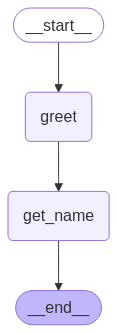

In [3]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

Now that we have created our simple LangGraph flow, let's test it:

In [4]:
# Initialize the state
initial_state = {"messages": [],"next_step":""}
# Run the graph
for event in app.stream(initial_state):
    for output in event.values():
        if "messages" in output:
            for message in output["messages"]:
                if message["role"] == "assistant":
                    print(f"Assistant: {message['content']}")
                elif message["role"] == "human":
                    print(f"Human: {message['content']}")
    
    # Check if 'next_step' exists
    if "next_step" in output and output["next_step"] == "get_name":
        user_input = input("Your response: ")
        output["messages"].append({"role": "human", "content": user_input})

print("Conversation ended.")


Assistant: Hello! What's your name?
Assistant: Hello! What's your name?
Human: Rahul
Assistant: Nice to meet you, Rahul! How can I assist you today?
Conversation ended.


## Conclusion

In this tutorial, we've introduced LangGraph and created a simple conversational flow. We've covered the basic concepts of nodes, edges, and graphs, and demonstrated how to set up a LangGraph workflow.

This is just the beginning of what you can do with LangGraph. In the next tutorial, we'll explore more complex flows, including branching logic and integration with LangChain components.